# FIR Filter Implementation

**FIR (Finite Impulse Response)** filters are digital filters with a finite-duration impulse response. They are widely used in signal processing for their stability and linear phase characteristics.

**Key Concepts:**
- FIR filters perform convolution between input signal and filter coefficients
- Output depends only on current and past input values (no feedback)
- Filter order = Number of taps - 1

**This notebook demonstrates:**
1. Custom convolution function implementation
2. FIR low-pass filter design using Hamming window
3. Filtering a composite signal to remove high-frequency components

## Import Libraries

In [ ]:
import numpy as np               # For numerical computations
import matplotlib.pyplot as plt  # For plotting graphs
from scipy.signal import firwin  # For FIR filter coefficient generation

## Convolution Function

**Convolution** is the fundamental operation in FIR filtering. The output $y[n]$ is computed as:

$$y[n] = \sum_{k=0}^{M-1} h[k] \cdot x[n-k] = (x * h)[n]$$

Where:
- $x[n]$ = Input signal
- $h[k]$ = Filter impulse response (FIR coefficients)
- $M$ = Number of filter taps
- Output length = len(x) + len(h) - 1

In [ ]:
def convolve(x, h):
    """
    Perform linear convolution of two sequences.
    
    Parameters:
        x: Input signal array
        h: Impulse response (filter coefficients)
    
    Returns:
        y: Convolved output signal (length = len_x + len_h - 1)
    """
    len_x = len(x)  # Length of input signal
    len_h = len(h)  # Length of filter (number of taps)
    len_y = len_x + len_h - 1  # Output length formula for linear convolution
    y = [0] * len_y  # Initialize output array with zeros

    # Perform convolution: y[i] = Σ x[k] * h[i-k]
    for i in range(len_y):
        for k in range(len_x):
            # Check bounds: ensure h[i-k] index is valid
            if (i - k >= 0 and i - k < len_h):
                y[i] += x[k] * h[i - k]

    return y

## FIR Low-Pass Filter Design and Application

**Design a Low-Pass FIR Filter** using the window method (Hamming window):
- **Sampling frequency (fs):** 1000 Hz
- **Cutoff frequency:** 100 Hz
- **Number of taps:** 15 (filter order = 14)

**Test Signal:** $x(t) = \sin(2\pi \cdot 50t) + 0.5\sin(2\pi \cdot 200t)$
- Contains 50 Hz component (below cutoff → **passes through**)
- Contains 200 Hz component (above cutoff → **attenuated**)

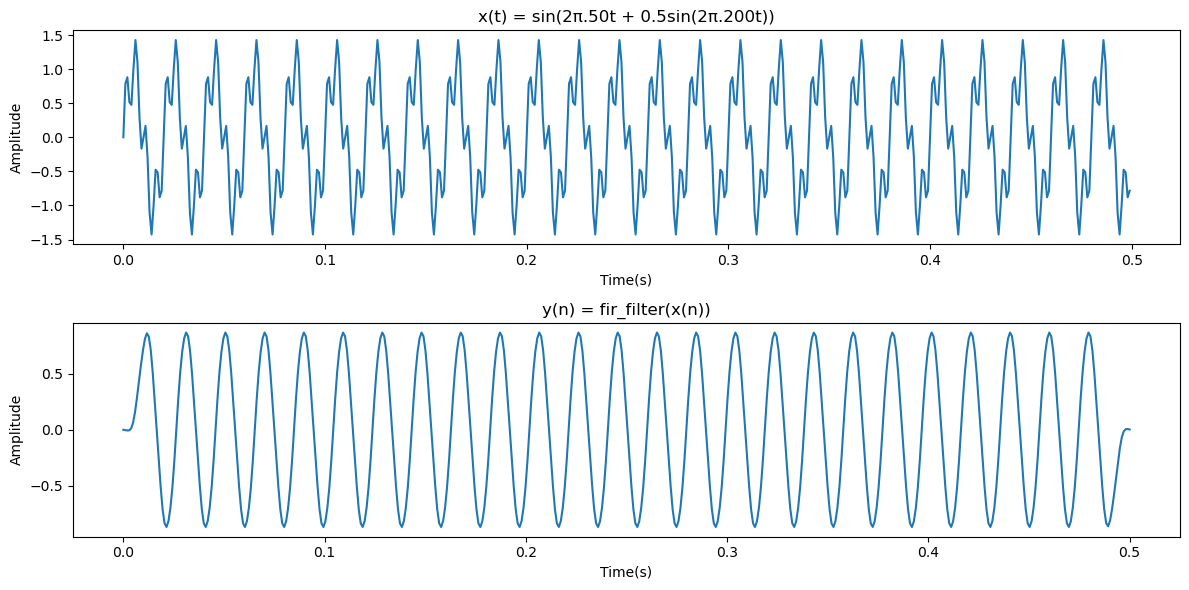

In [ ]:
# ===================== Filter Parameters =====================
fs = 1000           # Sampling frequency (Hz)
cutoff_freq = 100   # Cutoff frequency for low-pass filter (Hz)
num_taps = 15       # Number of filter coefficients (filter order = num_taps - 1)

# ===================== Generate FIR Filter Coefficients =====================
# firwin() designs FIR filter using window method
# Parameters: num_taps, cutoff frequency, sampling frequency, window type
fir_coefficients = firwin(num_taps, cutoff_freq, fs=fs, window="hamming")

# ===================== Generate Test Signal =====================
t = np.arange(0, 1.0, 1/fs)  # Time vector: 0 to 1 second
# Composite signal: 50 Hz (passes) + 200 Hz (attenuated by filter)
x = np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 200 * t)

# Truncate signal to 0.5 seconds for clearer visualization
t = t[t < 0.5]
x = x[:len(t)]

# ===================== Plot Input and Filtered Signals =====================
plt.figure(figsize=(12, 6))

# Plot 1: Original Input Signal (contains both 50 Hz and 200 Hz)
plt.subplot(2, 1, 1)
plt.plot(t, x)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('Input Signal: x(t) = sin(2π·50t) + 0.5·sin(2π·200t)')

# ===================== Apply FIR Filter via Convolution =====================
# y[n] = x[n] * h[n] (convolution of input with filter coefficients)
y = convolve(fir_coefficients, x)
t = np.linspace(0, 0.5, len(y))  # Adjust time axis for output length

# Plot 2: Filtered Output Signal (200 Hz component attenuated)
plt.subplot(2, 1, 2)
plt.plot(t, y)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('Filtered Output: y(n) = FIR_LowPass(x(n)) - 200 Hz attenuated')

plt.tight_layout()
plt.show()